<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/2_Implement_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

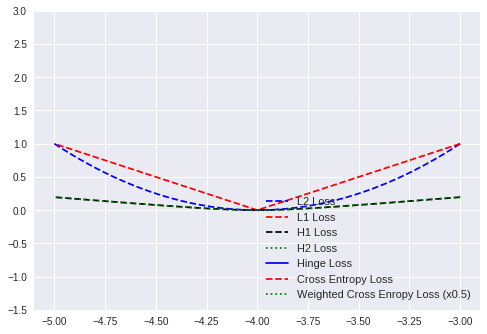

In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf

sess = tf.Session()

# Sequence of predictions and a target as our sensor
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

# L2 norm / Euclidean loss function. Computes square of distance to the target
# A Built in function to calculate norm - nn.l2_loss()
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

# L1 Norm / Absolute loss function.
# L1 Norm is better for outliers as it is not steep for large values
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

# Psuedo-Huber loss is a continuous and smooth approximation to Huber loss fun
# Convex near target and less steep for extreme values. Delta dictates steepness
def pseudo_huber(delta, x_vals, target):
  delta = tf.constant(0.25)
  phuber_y_vals = tf.multiply(tf.square(delta), tf.sqrt(1. + 
                        tf.square((target - x_vals)/delta)) - 1.)
  phuber_y_out = sess.run(phuber_y_vals)

  return phuber_y_vals, phuber_y_out

h1_y_vals, h1_y_out = pseudo_huber(0.25, x_vals, target)
h2_y_vals, h2_y_out = pseudo_huber(5, x_vals, target)


# Different x_vals and target
x_vals = tf.linspace(-3., -5., 500)
target = tf.constant(1.)
targets = tf.fill([500], 1.)


# Hinge loss. Used in Support-vector-machines. Can be used in NNs as well
# Computes loss between two target classes
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

# Cross-Entropy/Logistic loss function
# predicting two classes 0 or 1. We can use cross entropy formula from
# information theory
xentropy_y_vals = -tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

# Sigmoid cross entropy loss. Same as above, except x-values are transformed
# by sigmoid function before.
# Failing currently. Check again parameter sent to nn.sigmoid
# xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=target)
# xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)


# Weighted Cross Entry - Weighted version of sigmoid cross entropy
weight = tf.constant(0.5)
xentropy_weight_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weight_y_vals)

# Softmax Cross-Entropy loss. Used when one target category exists instead of mulitple
# Output -> (Softmax) -> Probability Distribution -> Compute loss
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=unscaled_logits, labels=target_dist)
#print(sess.run(softmax_entropy))

# Sparse Softmax entropy - same as above, except that target is index of which 
# category is true 
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist)
#print(sess.run(sparse_entropy))


# Matplot for Regression losses
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b--', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, h1_y_out, 'k--', label='H1 Loss')
plt.plot(x_array, h2_y_out, 'g:', label= 'H2 Loss')
plt.ylim(-0.2, 0.4)
plt.legend(loc = 'lower right', prop={'size':11})
plt.show


# Matplot for various classification losses
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
#plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Enropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()